In [3]:
"""
Created on Fri May 3 14:28:18 2019

#Mst. Mahfuja Akter (s6msakte@uni-bonn.de)
#M Shahzaib (s6mmshah@uni-bonn.de)
#Mahpara Hyder Chowdhury (s6machow@uni-bonn.de)
"""
      
# 2.1
import math
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline

def PL_FSP(lambda_, d):
    return 10 * mylog10((math.pow(d, 2) * math.pow(4 * math.pi, 2)) / math.pow(lambda_, 2))

def PL_TRG(ht, hr, d):
    return 10 * mylog10(math.pow(d, 4) / (math.pow(ht, 2) * math.pow(hr, 2)))

def dc(lambda_, ht, hr):
    return (4 * math.pi * hr * ht) / lambda_

def PL_TLD(d, d0, d1, d2, L0, n0, n1, n2):
    if d < d0:
        return 0
    elif d0 <= d and d < d1:
        return L0 + 10 * n0 * mylog10(d/d0)
    elif d1 <= d and d < d2:
        return L0 + 10 * n0 * mylog10(d1/d0) + 10 * n1 * mylog10(d/d1)
    elif d2 <= d:
        return L0 + 10 * n0 * mylog10(d1/d0) + 10 * n1 * mylog10(d2/d1) + 10 * n2 * mylog10(d/d2)
    
def mylog10(x):
    return  math.log10(max(0.00000000000000000000001,x))

In [4]:
def PL_FSP_func(d):
    lambda_ = 1.35
    ht = 50
    hr = 2
    d0, d1, d2 = 1, 200, 500
    n0, n1, n2 = 2.0, 3.0, 3.0
    L0 = 19.377
    dc_val = dc(lambda_, ht, hr)
    return PL_FSP(lambda_, d) if d <= dc_val else PL_TRG(ht, hr, d)


def PL_TLD_func(d):
    lambda_ = 1.35
    ht = 50
    hr = 2
    d0, d1, d2 = 1, 200, 500
    n0, n1, n2 = 2.0, 3.0, 3.0
    L0 = 19.377
    dc_val = dc(lambda_, ht, hr)
    return PL_TLD(d, d0, d1, d2, L0, n0, n1, n2)

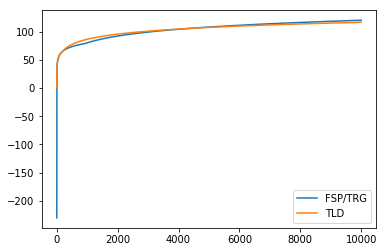

In [5]:
# 2.2
out = []
for d in range(10000):
    out.append([PL_FSP_func(d), PL_TLD_func(d)])

df = pd.DataFrame(out, columns=['FSP/TRG', 'TLD'])

df.plot()

In [6]:
# 2.3
out = []

for d in (1000,5000,10000):
    out.append([d,PL_FSP_func(d), PL_TLD_func(d)])

df = pd.DataFrame(out, columns=['Distance','FSP/TRG', 'TLD'])

print(df)

   Distance   FSP/TRG       TLD
0      1000   80.0000   86.3667
1      5000  107.9588  107.3358
2     10000  120.0000  116.3667


In [7]:
#3.1
data = pd.read_csv("ex1.csv")
data.columns = ['timestamp', 'x','y','rs']
data["start_x"], data["start_y"] =  50.4202596, 7.504913

# lats
data["a"] = (data.x - data.start_x) * 111320
# longs
data["b"] = (data.y - data.start_y) * 111320 * data["a"].apply(np.cos)


#distance calulation
data.a = data.a.apply(np.square) # dist in x dimention
data.b = data.b.apply(np.square) # dist in y dimention
data["d"] = data.a + data.b
data.d = data.d.apply(np.sqrt) # dist

#pathloss calculation
data["FSP"] = data.d.apply(PL_FSP_func) # path loss FSP calc.
data["TLD"] = data.d.apply(PL_TLD_func) # path loss TLD calc.

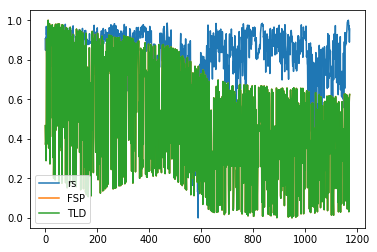

In [8]:
#3.2
# normalization
data["FSP"] = (data["FSP"] - min(data["FSP"])) / (max(data["FSP"]) - min(data["FSP"]))
data["TLD"] = (data["TLD"] - min(data["TLD"])) / (max(data["TLD"]) - min(data["TLD"]))
data["rs"] = (data["rs"] - min(data["rs"])) / (max(data["rs"]) - min(data["rs"]))

# inversing relative strength to see the correlation clearly
data.rs = np.abs(data.rs - 1)

data[["rs", "FSP", "TLD"]].plot()